In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_max_lesion_area_registered_fused_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_max_lesion_area_registered_fused_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_max_lesion_area_registered_fused_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_max_lesion_area_registered_fused_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_max_lesion_area_registered_fused_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_max_lesion_area_registered_fused_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  376
Number val images:  15
Number test images:  14


In [4]:
model_name = 'vgg_bayesian_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.97276311 0.02723689]
[ 1.         35.71490846]
[0.02761469 3.6031829 ]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
47/47 [==============================] - 1555s 33s/step - loss: 0.0482 - acc: 0.5909 - dice: 0.0840 - iou: 0.0441 - val_loss: 0.1217 - val_acc: 0.8985 - val_dice: 0.1017 - val_iou: 0.0536
Epoch 1
Epoch 1/1
47/47 [==============================] - 1624s 35s/step - loss: 0.0303 - acc: 0.6411 - dice: 0.1080 - iou: 0.0574 - val_loss: 0.0804 - val_acc: 0.8406 - val_dice: 0.1021 - val_iou: 0.0538
Epoch 2
Epoch 1/1
47/47 [==============================] - 1624s 35s/step - loss: 0.0249 - acc: 0.7273 - dice: 0.1388 - iou: 0.0751 - val_loss: 0.0890 - val_acc: 0.9258 - val_dice: 0.0752 - val_iou: 0.0391
Epoch 3
Epoch 1/1
47/47 [==============================] - 1634s 35s/step - loss: 0.0216 - acc: 0.8015 - dice: 0.1817 - iou: 0.1009 - val_loss: 0.0776 - val_acc: 0.9100 - val_dice: 0.0851 - val_iou: 0.0444
Epoch 4
Epoch 1/1
47/47 [==============================] - 1634s 35s/step - loss: 0.0195 - acc: 0.8361 - dice: 0.2116 - iou: 0.1197 - val_lo

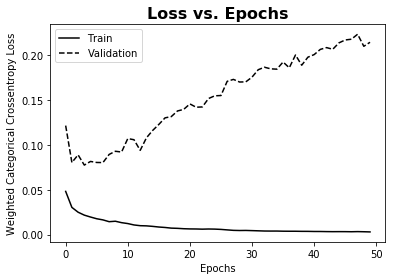

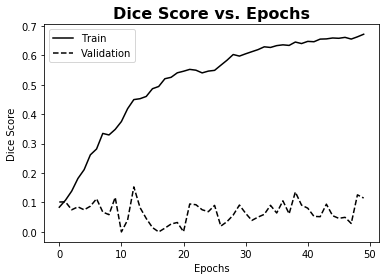

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  63144.430304979


In [9]:
epochs = 49

In [10]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99  18452344
           1       0.67      0.98      0.80    413832

   micro avg       0.99      0.99      0.99  18866176
   macro avg       0.84      0.98      0.90  18866176
weighted avg       0.99      0.99      0.99  18866176

F1/dice (binary):  0.7960575760948687
Jaccard/IOU:  0.661209008245395


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [12]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    740323
           1       0.18      0.10      0.13     12317

   micro avg       0.98      0.98      0.98    752640
   macro avg       0.58      0.54      0.56    752640
weighted avg       0.97      0.98      0.97    752640

F1/dice (binary):  0.12596992561673892
Jaccard/IOU:  0.06721873215305539


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [14]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    686380
           1       0.37      0.37      0.37     16084

   micro avg       0.97      0.97      0.97    702464
   macro avg       0.68      0.68      0.68    702464
weighted avg       0.97      0.97      0.97    702464

F1/dice (binary):  0.37064048620850865
Jaccard/IOU:  0.22747618501090325


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)